# Assignment's Name

# i. Introduction

**Name:** Yunus
**Problem statement:**  
Menurut laporan FIFA 2022 jumlah pemain sepakbola pada tahun 2021 kurang lebih sebanyak 130.000 pemain. Namun, dalam dataset yang digunakan pada kali ini, hanya mencakup 20.000 pemain.  
**Objective:**  
 Project kali ini bertujuan untukk memprediksi rating pemain FIFA 2022 sehingga semua pemain sepakbola professional dapat diketahui ratingnya dan tidak menutup kemungkinan untuk lahirnya talenta baru dengan model `Linear Regression` dan metrics `MAE,MSE,RMSE,dan R2 score`.

# ii. Import Libraries

In [57]:
# Import Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
import phik
from sklearn.preprocessing import StandardScaler,RobustScaler,OrdinalEncoder

# Import model
from sklearn.linear_model import LinearRegression

# Import evaluation model
from sklearn.metrics import mean_absolute_error

# Import for saving model
import pickle
import json

# Ignore warning
import warnings
warnings.filterwarnings('ignore')


# iii. Data Loading

In [2]:
# Import data
df_ori = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')

# Duplicate data
df = df_ori.copy()

# Show top 5 data
df.head()

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91


In [3]:
# Checking dataset-1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   ValueEUR           19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Overall            19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


statement?? ... rows ...columns, misval? jumlah numerical categorical ? + make sure setiap data sudah sesuai dengan tipenya/cek numerical features apakah benar2 termasuk numerical features atau categorical feature yang sudah di encode? contoh:  
gender tipe kolom integer. isinya 1 = male 0 = female. ini harusnya termasuk dalam kategorikal encoded column.

praktek:  
Nominal column = 'Name'  
Ordinal column = 'AttackingWorkRate', 'DefensiveWorkRate'  
categorical encoded = -  
Numerical = 'Age', 'Height', 'Weight', 'ValueEUR','PaceTotal', 'ShootingTotal', 'PassingTotal','DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'

In [4]:
# Checking dataset-2
df.describe()

,Age,Height,Weight,ValueEUR,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
count,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000
mean,25.184683,181.305036,74.950779,2.857652e+06,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,65.815628
std,4.737340,6.866151,7.066864,7.604532e+06,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,6.817297
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.0000,58.000000,62.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.0000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.0000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.0000,92.000000,93.000000


statement??

In [5]:
# Checking dataset-3
df.duplicated().sum()

104

In [6]:
df.drop_duplicates(inplace=True) # cara 1
# df = df.drop_duplicates()      # cara 2

In [7]:
df.duplicated().sum()

0

# iv. Exploratory Data Analysis (EDA)

obj1: Ingin melihat persebaran rating pada dataset dan juga ingin melihat proporsi antara berat badan dan tinggi badan.

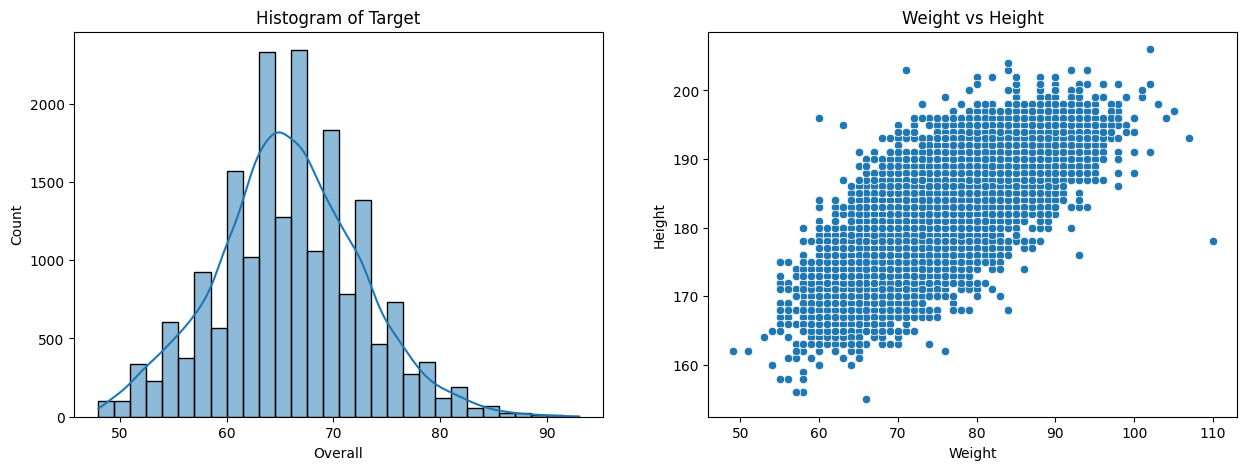

In [8]:
# Create Histogram and Scatter Plot

# Create canvas
plt.figure(figsize=(15,5))

# Plot 1st visualization
plt.subplot(1,2,1)
sns.histplot(df.Overall,kde=True,bins=30)
plt.title('Histogram of Target')

# Plot 2nd visualization
plt.subplot(1,2,2)
sns.scatterplot(x='Weight', y='Height', data=df)
plt.title('Weight vs Height')

plt.show()

statementt??

visualisasi 2,3,dst

objektif + insight

# v. Data Preprocessing (Feature Engineering)

### Split between X (Features/Variables) and y (Target/Label)

In [9]:
# Split X and y
# X = df.drop(['Overall'],axis=1) # cara1
# X = df.drop(columns=['Overall'])# cara2
X =  df[['Name', 'Age', 'Height', 'Weight', 'ValueEUR', 'AttackingWorkRate', 
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']] # cara3

# y = df.Overall    # cara1
y = df['Overall'] # cara2

print(X.columns)
print(y)

Index(['Name', 'Age', 'Height', 'Weight', 'ValueEUR', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'],
      dtype='object')
0        93
1        92
2        91
3        91
4        91
         ..
19255    48
19256    48
19257    48
19258    48
19259    48
Name: Overall, Length: 19156, dtype: int64


### Split train set dan test set

In [10]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print('Train-set:',X_train.shape)
print('Test-set:',X_test.shape)

Train-set: (15324, 13)
Test-set: (3832, 13)


## a. Missing value handling

In [11]:
X_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
ValueEUR             0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [12]:
X_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
ValueEUR             0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [13]:
y_train.isnull().sum()

0

In [14]:
y_test.isnull().sum()

0

## b. Outlier Handling

In [15]:
# Detect categorical colums
X[X.select_dtypes(include=['object']).columns]

,Name,AttackingWorkRate,DefensiveWorkRate
0,L. Messi,Medium,Low
1,R. Lewandowski,High,Medium
2,Cristiano Ronaldo,High,Low
3,K. Mbappé,High,Low
4,J. Oblak,Medium,Medium
...,...,...,...
19255,S. Black,Medium,Medium
19256,Ma Zhen,Medium,Medium
19257,Yang Haoyu,Medium,Medium
19258,He Siwei,Medium,Medium


In [16]:
# Create looping to check distribution numerical dataset

num = X.select_dtypes(exclude=['object']).columns.tolist()

# Create empty list to contain/add/fill (menyimpan) column lists
normal = []
skew = []
extreme = []
for i in num:
    print(f'skewness {i}: {round(X_train[i].skew(),3)}')

    if abs(round(X_train[i].skew(),3)) > 1: #abs itu absolute syntax python
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.') # cara 1
print('skew distribution:',skew, '.') # cara 2
print(f'extreme skew distribution:{extreme}.')

skewness Age: 0.445
skewness Height: -0.031
skewness Weight: 0.249
skewness ValueEUR: 8.265
skewness PaceTotal: -0.507
skewness ShootingTotal: -0.4
skewness PassingTotal: -0.192
skewness DribblingTotal: -0.521
skewness DefendingTotal: -0.257
skewness PhysicalityTotal: -0.402
normal distribution: ['Age', 'Height', 'Weight', 'ShootingTotal', 'PassingTotal', 'DefendingTotal', 'PhysicalityTotal'].
skew distribution: ['PaceTotal', 'DribblingTotal'] .
extreme skew distribution:['ValueEUR'].


Berdasarkan hasil di atas, kolom yang terdistribusi (Manual):  
1. Normal (-0.5 s/d 0.5): `Age, Height, Weight, ShootingTotal, PassingTotal, DefendingTotal, PhysicalityTotal`  
2. Moderately Skew (-0.5 s/d -1 atau 0.5 s/d 1): `PaceTotal,DribblingTotal`  
3. Extreme Skew (> 1 atau < -1) : `ValueEUR`

### Outlier checking for each distribution type

### Normal check

In [17]:
# Create function for normal distributed
def calculate_normal_outliers(df, variable):
 
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
        
    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    # print(f'upper: {upper_boundary}')
    # print(f'lower: {lower_boundary}')
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')


In [18]:
for i in normal:
    calculate_normal_outliers(X_train,i)
    print('')

Outlier Age : 21
% Outlier Age : 0.14%

Outlier Height : 21
% Outlier Height : 0.14%

Outlier Weight : 43
% Outlier Weight : 0.28%

Outlier ShootingTotal : 0
% Outlier ShootingTotal : 0.0%

Outlier PassingTotal : 39
% Outlier PassingTotal : 0.25%

Outlier DefendingTotal : 0
% Outlier DefendingTotal : 0.0%

Outlier PhysicalityTotal : 28
% Outlier PhysicalityTotal : 0.18%



In [19]:
21+21+43+39+28


152

In [20]:
X_train.shape[0] - 152

15172

Karena semuanya di bawah 5%, jadi di trimming(drop) saja.

### Skew & Extreme check

In [21]:
# Create function for skew distributed
def calculate_skewed_outliers(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    # print(f'upper: {upper_boundary}')
    # print(f'lower: {lower_boundary}')
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

#### Skew

In [22]:
# cara 1, manually calling function
calculate_skewed_outliers(X_train,'PaceTotal',1.5) 

Outlier PaceTotal : 358
% Outlier PaceTotal : 2.34%


In [23]:
# cara 2, using loop to calling function
for i in skew:
    calculate_skewed_outliers(X_train,i,1.5)
    print('')

Outlier PaceTotal : 358
% Outlier PaceTotal : 2.34%

Outlier DribblingTotal : 560
% Outlier DribblingTotal : 3.65%



<Axes: ylabel='Frequency'>

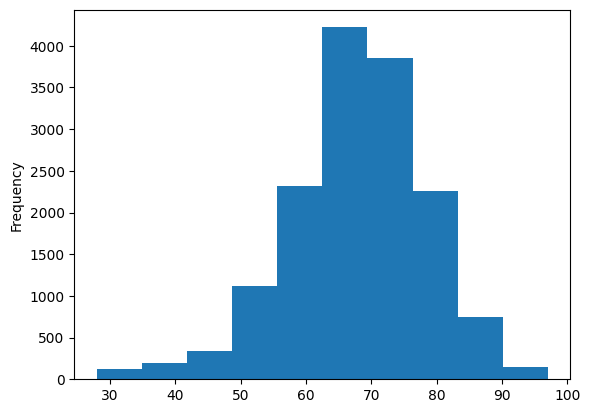

In [24]:
# Visualisasi sederhana 
X_train.PaceTotal.plot(kind='hist')

<Axes: >

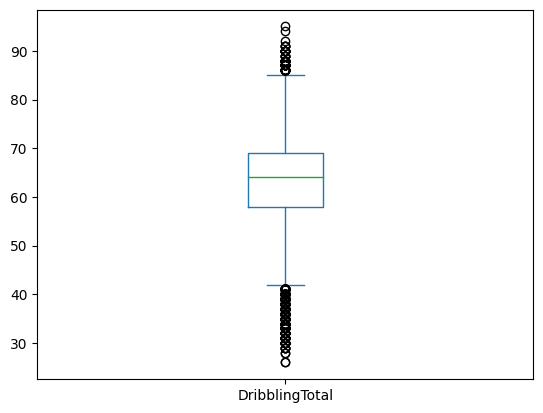

In [25]:
# Visualisasi sederhana
X_train.DribblingTotal.plot(kind='box')

Karena outliers untuk features `PaceTotal` dan `DribblingTotal` di bawah 5%, handling nya akan menggunakan metode trimming.

#### Extreme skew

In [26]:
# cara 2, using loop to calling function
for i in extreme:
    calculate_skewed_outliers(X_train,i,3)
    print('')

Outlier ValueEUR : 1211
% Outlier ValueEUR : 7.9%



Karena outliernya >5%, outliers akan dihandling menggunakan metode capping dengan bantuan library `winsorizer` dari `feature-engine`.

### Handling with trimming method

In [27]:
Trim_normal_features_list = ['Age',
 'Height',
 'Weight',
 'ShootingTotal',
 'PassingTotal',
 'DefendingTotal',
 'PhysicalityTotal'] 
Trim_skew_features_list = ['PaceTotal', 'DribblingTotal']

In [28]:
def drop_normal_outliers(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index, inplace=True)
      
def drop_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)
    

In [29]:
for i in Trim_normal_features_list:
    drop_normal_outliers(X_train,i)

print(f'Before trim: {X_train.shape}') 

Before trim: (15173, 13)


In [30]:
for i in Trim_skew_features_list:
    drop_skew_outliers(X_train,i,1.5)

print(f'Before trim: {X_train.shape}') 

Before trim: (14344, 13)


In [31]:
# masih belum sesuai dengan yg terdeksi di atas
15141-(358+560)

14223

In [32]:
y_train = y_train.loc[X_train.index]

### Handling with capping method (winsorizer)

In [33]:
# Capping for `ValueEUR` feature

winsoriser_value = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['ValueEUR'])

X_train_capped = winsoriser_value.fit_transform(X_train)

## c.Feature Selection

In [34]:
# Concat features and target to check correlation
corr = pd.concat([X_train,y_train],axis=1)
corr.columns

Index(['Name', 'Age', 'Height', 'Weight', 'ValueEUR', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Overall'],
      dtype='object')

In [35]:
# Check correlation
corr.phik_matrix()['Overall']

interval columns not set, guessing: ['Age', 'Height', 'Weight', 'ValueEUR', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Overall']


Name                 0.480956
Age                  0.532574
Height               0.076597
Weight               0.197894
ValueEUR             0.875903
AttackingWorkRate    0.213354
DefensiveWorkRate    0.217595
PaceTotal            0.355249
ShootingTotal        0.742817
PassingTotal         0.745910
DribblingTotal       0.785039
DefendingTotal       0.716781
PhysicalityTotal     0.627627
Overall              1.000000
Name: Overall, dtype: float64

Drop features yang < 5 = ['Name','Height','Weight','PaceTotal'] . Kusus ['AttackingWorkRate','DefensiveWorkRate'] tidak di drop karena supaya belajar untuk coba encode categorical column.

In [36]:
# Drop unnecessary columns in X_train
X_train.drop(['Name','Height','Weight','PaceTotal'], axis=1, inplace=True)

# Drop unnecessary columns in X_test
X_test.drop(['Name','Height','Weight','PaceTotal'], axis=1, inplace=True)

In [37]:
X_train.columns

Index(['Age', 'ValueEUR', 'AttackingWorkRate', 'DefensiveWorkRate',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal'],
      dtype='object')

## d. Split Numerical and Categorical Columns

In [41]:
num_col = ['Age', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal','ValueEUR']

num_col_std = ['Age', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
num_col_rbs = ['ValueEUR']
# cat_col = X_train.select_dtypes(include=['object']).columns.tolist() # cara 1
cat_col = ['AttackingWorkRate', 'DefensiveWorkRate'] # cara 2

print(num_col_std)
print(num_col_rbs)
print(cat_col)


['Age', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
['ValueEUR']
['AttackingWorkRate', 'DefensiveWorkRate']


## e. Cardinality Check

In [42]:
# Countin unique value for each categorical columns
for i in cat_col:
    print(f'{i} : {X_train[i].nunique()}')

AttackingWorkRate : 3
DefensiveWorkRate : 3


Dari hasil di atas, terdapat 3 untuk setiap cat col, bisa di simpulkan dataset ini low cardinality dan tidak perlu handling/reduce cardinality.

PS: High cardinality itu biasanya jika terdapat nunique yang >11.

## f. Feature Scaling

In [43]:
# Create empty list to contain/add/fill (menyimpan) column lists
normal = []
skew = []
extreme = []
for i in num_col:
    # print(f'skewness {i}: {round(X_train[i].skew(),3)}')

    if abs(round(X_train[i].skew(),3)) > 1: #abs itu absolute syntax python
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.') # cara 1
print('skew distribution:',skew, '.') # cara 2
print(f'extreme skew distribution:{extreme}.')

normal distribution: ['Age', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'].
skew distribution: [] .
extreme skew distribution:['ValueEUR'].


In [44]:
# Define X_train_num
X_train_num_std = X_train[num_col_std]
X_test_num_std = X_test[num_col_std]

X_train_num_rbs = X_train[num_col_rbs]
X_test_num_rbs = X_test[num_col_rbs]

# Define scaling method
std_scaler = StandardScaler()
rbs_scaler = RobustScaler()

# Standard Scaler
std_scaler.fit(X_train_num_std) # .fit hanya untuk X_train

X_train_num_std_scaled = std_scaler.transform(X_train_num_std)
X_test_num_std_scaled = std_scaler.transform(X_test_num_std)

# Robust Scaler
rbs_scaler.fit(X_train_num_rbs) # .fit hanya untuk X_train

X_train_num_rbs_scaled = rbs_scaler.transform(X_train_num_rbs)
X_test_num_rbs_scaled = rbs_scaler.transform(X_test_num_rbs)

## g. Feature Encoding


pakai ordinal karena data nya ordinal

In [45]:
# Define X_train_cat
X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

# Define encoding method
encoder = OrdinalEncoder(categories=[['Low','Medium','High'],
                                     ['Low','Medium','High']])

# .fit_transform -> train set & .transform -> test set
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)


## h. Concat

In [46]:
# concat all X_train and X_test
X_train_final = np.concatenate([X_train_num_std_scaled,X_train_num_rbs_scaled,X_train_cat_encoded],axis=1)
X_test_final = np.concatenate([X_test_num_std_scaled,X_test_num_rbs_scaled,X_test_cat_encoded],axis=1)
X_train_final

array([[-0.87842344, -1.33302288, -1.25907031, ..., -0.296875  ,
         1.        ,  1.        ],
       [-0.2264915 ,  0.28014511,  0.17647986, ..., -0.078125  ,
         1.        ,  1.        ],
       [ 1.51199365,  0.20332759, -0.81736256, ..., -0.5625    ,
         1.        ,  1.        ],
       ...,
       [ 0.20812978,  0.8946853 ,  1.17032228, ...,  0.4375    ,
         1.        ,  1.        ],
       [-0.44380215,  0.51059768,  0.28690679, ...,  0.25      ,
         1.        ,  1.        ],
       [ 1.7293043 ,  0.04969254, -0.26522789, ..., -0.58125   ,
         1.        ,  1.        ]])

In [47]:
# (opsional) di rubah dalam bentuk dataframe
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df


,0,1,2,3,4,5,6,7,8
0,-0.878423,-1.333023,-1.259070,-0.827935,0.516513,-0.677778,-0.296875,1.0,1.0
1,-0.226492,0.280145,0.176480,0.492089,0.273557,-0.048872,-0.078125,1.0,1.0
2,1.511994,0.203328,-0.817363,-0.587930,-0.273092,-0.887414,-0.562500,1.0,1.0
3,-1.095734,-2.178016,-2.142486,-2.627968,0.637990,-0.258508,-0.312500,1.0,1.0
4,0.860062,0.664233,1.391176,1.092100,1.852766,2.257118,13.125000,1.0,2.0
...,...,...,...,...,...,...,...,...,...
14339,1.946615,0.664233,-0.154801,-0.227924,-1.244913,0.055946,-0.506250,2.0,1.0
14340,1.294683,1.893313,1.943311,1.812113,-0.880480,-0.468143,5.000000,1.0,0.0
14341,0.208130,0.894685,1.170322,0.732094,0.516513,0.580034,0.437500,1.0,1.0
14342,-0.443802,0.510598,0.286907,0.612092,-2.034517,-0.153690,0.250000,1.0,1.0


# vi. Model Definition

Notes:  
1. Algoritma/Model yang digunakan : [contoh] `LinearRegression`.
   - Alasan? kelebihan kelemahan, datanya, cocok karena feature nya...
2. Metrics yang digunakan : [contoh] `MAE` (Mean Absolute Error)
   - Alasan

In [49]:
# Define the model
model_lin = LinearRegression()

# vii. Model Training

In [50]:
# Train the model Linear
model_lin.fit(X_train_final, y_train)

LinearRegression()

# viii. Model Evaluation

In [51]:
# Predict train-set dan test-set
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

#### (opsional) tampilin hasil prediksi

In [52]:
y_pred_train

array([60.75555987, 67.27551875, 62.33756477, ..., 70.60194383,
       64.33054397, 61.16263448])

In [53]:
y_pred_test

array([64.3335355 , 64.02210958, 70.42533337, ..., 61.14002441,
       65.17844291, 72.45656675])

In [55]:
# Evaluate model using MAE
print(f'Error - train set:{mean_absolute_error(y_pred_train,y_train)}')
print(f'Error - test set:{mean_absolute_error(y_pred_test,y_test)}')

Error - train set:2.223378008496891
Error - test set:2.36764180128085


In [56]:
70-2.36

67.64

stetement??? -> mae 2.36 (test) itu artinya model kita bisa miss/meleset prediksi +- 2.36 misal diprediksinya 70, maka margin errornya di range 67.64 s/d 72.36.

Jelaskan juga apakah model termasuk under/over/goodfit?

Business insight nya apa?

Hal" unik dari EDA apa?

# ix. Model Saving for Inference Data

In [58]:
# save the model!
with open('model_lin.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(model_lin, file_1)

# save the scaler!
with open('std_scaler.pkl', 'wb') as file_2:
    pickle.dump(std_scaler, file_2)

with open('rbs_scaler.pkl', 'wb') as file_3:
    pickle.dump(rbs_scaler, file_3)

# save the encoder
with open('encoder.pkl', 'wb') as file_4:
    pickle.dump(encoder, file_4)

# save the num col
with open('num_col_std.txt', 'w') as file_5:
    json.dump(num_col_std, file_5)

with open('num_col_rbs.txt', 'w') as file_6:
    json.dump(num_col_rbs, file_6)

# save the cat col
with open('cat_col.txt', 'w') as file_7:
    json.dump(cat_col, file_7)

In [59]:
# Check columns for inference data
df_ori.columns

Index(['Name', 'Age', 'Height', 'Weight', 'ValueEUR', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Overall'],
      dtype='object')

# x. Kesimpulan

Make sure objective dan problem statement terjawab. Further improvement? 